In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.linear_model import LinearRegression

my_path = r"C:\Users\86136\OneDrive\Desktop\2025近物实验\Cyh\法拉第效应\data.xlsx"
# 设置中文字体和负号正常显示
rcParams['font.sans-serif'] = ['SimHei']
rcParams['axes.unicode_minus'] = False

In [ ]:
def get_data(path = my_path, my_sheet_name = 'Sheet1', my_cols='A,B'):

    df = pd.read_excel(path, sheet_name = my_sheet_name, usecols=my_cols)
    # df = df[[x_col, y_col]]

    x = df.values[:,0]
    x = x[~pd.isnull(x)]
    x = [x2 for x2 in x if isinstance(x2, (float, int))]
    print('x:', x)
    y = df.values[:,1]
    y = y[~pd.isnull(y)]
    y = [val*1 for val in y if isinstance(val, (int, float))]
    print('y is:', y)
    return x, y

def my_plot(x, y, my_x_label, my_y_label, my_label='', my_title='', my_figsize=(10, 6), 
            liner_fit=False, scatter_on=False, limition=False):
    plt.figure(figsize=my_figsize)
    plt.title(my_title)
    plt.xlabel(my_x_label)
    plt.ylabel(my_y_label)

    if limition:
        plt.xlim(0, 1.2*max(x))
        plt.ylim(0, 1.2*max(y))
    
    if liner_fit:
        X_train = np.array(x).reshape(len(x), 1)  
        Y_train = np.array(y).reshape(len(y), 1) 

        lineModel = LinearRegression()
        lineModel.fit(X_train, Y_train)

        Y_predict = lineModel.predict(X_train)

        #coef_是系数，intercept_是截距
        k = lineModel.coef_[0]
        b = lineModel.intercept_[0]
        
        print("y=%.4f*x+%.4f" % (k,b))
        print("R2 = ", lineModel.score(X_train, Y_train))

        plt.scatter(x, y, marker='o', color='red')
        plt.plot(X_train, Y_predict, c="red", label=my_label)

    elif scatter_on:
        plt.scatter(x, y, marker='o', color='red', label=my_label)


    else:
        plt.plot(x, y, marker='o', color='red', label=my_label)



    plt.legend()
    plt.show()
    return

x: [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.1, 1.3, 1.5, 1.7, 1.9]
y is: [0.048, 0.1184, 0.1928, 0.2684, 0.3435, 0.3791, 0.4168, 0.4917, 0.5687, 0.6413, 0.7133]
y=0.3718*x+0.0083
R2 =  0.9999515856196202


C:\Users\86136\AppData\Local\Temp\ipykernel_22852\302232656.py:40: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("y=%.4f*x+%.4f" % (k,b))


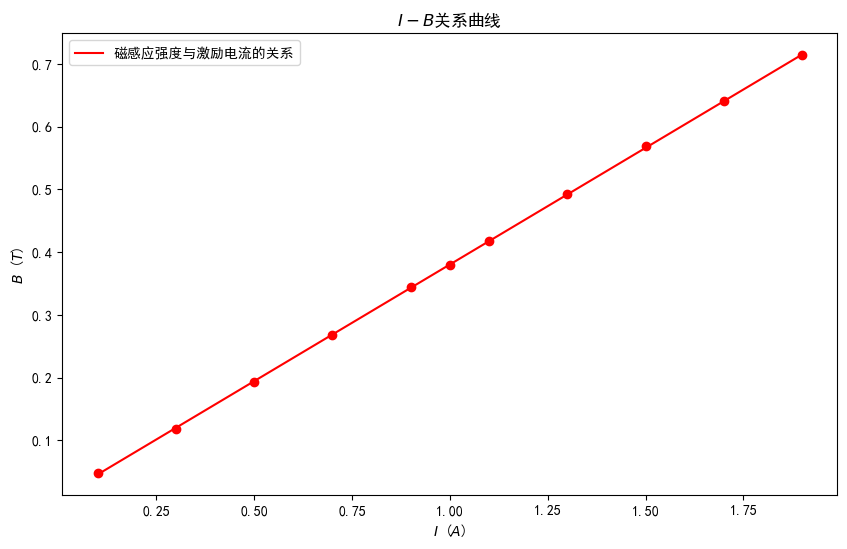

In [13]:
x1, y1 = get_data(my_sheet_name = '磁场的定标与磁场均匀性', my_cols='A,B')

my_plot(x1, y1, 
        my_x_label='$I$ ($A$)', my_y_label='$B$ ($T$)', 
        my_label='磁感应强度与激励电流的关系',
        my_title='$I-B$关系曲线', 
        my_figsize=(10, 6),
        liner_fit=True)

x: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]
y is: [0.3791, 0.3641, 0.3684, 0.3403, 0.3714, 0.3835, 0.3651]


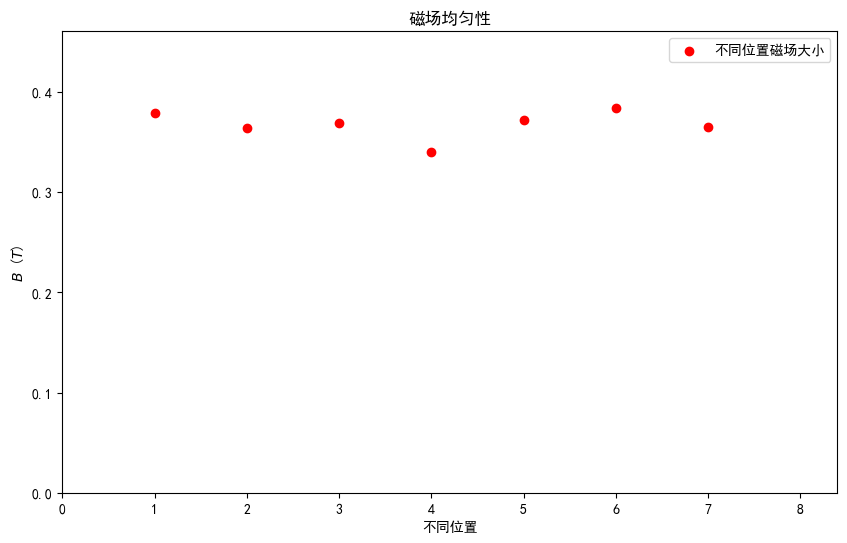

In [14]:
x2, y2 = get_data(my_sheet_name = '磁场的定标与磁场均匀性', my_cols='C,D')

my_plot(x2, y2, 
        my_x_label='不同位置', my_y_label='$B$ ($T$)', 
        my_label='不同位置磁场大小',
        my_title='磁场均匀性', 
        my_figsize=(10, 6),
        liner_fit=False,
        scatter_on=True,
        limition=True)

x: [0.3801, 0.41728000000000004, 0.45446, 0.49164, 0.52882, 0.5660000000000001, 0.60318, 0.64036, 0.67754, 0.71472]
y is: [188.05555555555554, 188.87777777777777, 189.9777777777778, 190.48888888888888, 192.35555555555555, 193.5222222222222, 194.54444444444445, 195.34444444444443, 196.45555555555555, 197.51111111111112]
y=29.0660*x+176.8023
R2 =  0.9941117808665207


C:\Users\86136\AppData\Local\Temp\ipykernel_22852\302232656.py:40: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("y=%.4f*x+%.4f" % (k,b))


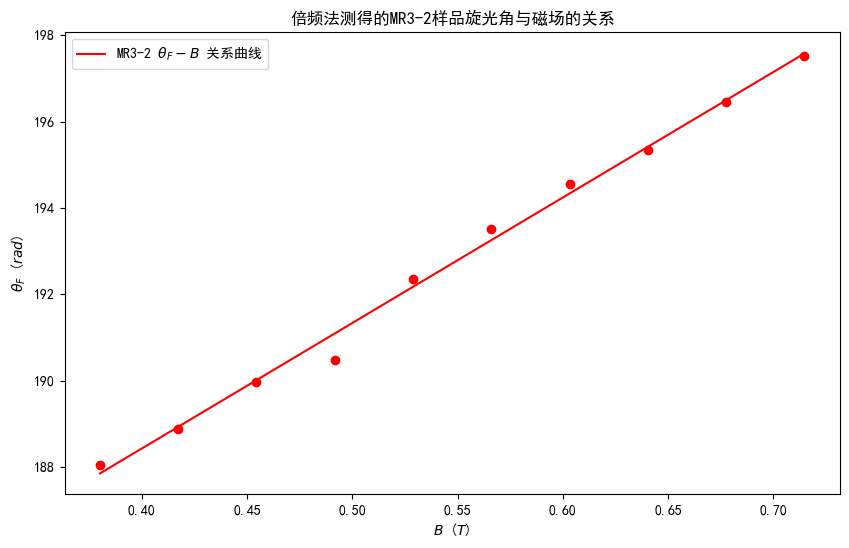

In [35]:
x3, y3 = get_data(my_sheet_name = '倍频法', my_cols='A, G')

my_plot(x3, y3, 
        my_x_label='$B$ ($T$)', my_y_label=r'$\theta_{F}$ ($rad$)', 
        my_label=r'MR3-2 $\theta_{F}-B$ 关系曲线',
        my_title='倍频法测得的MR3-2样品旋光角与磁场的关系', 
        my_figsize=(10, 6),
        liner_fit=True)

x: [0.3801, 0.41728000000000004, 0.45446, 0.49164, 0.52882, 0.5660000000000001, 0.60318, 0.64036, 0.67754, 0.71472]
y is: [260.64444444444445, 260.73333333333335, 260.8, 260.77777777777777, 260.7888888888889, 260.7888888888889, 260.81111111111113, 260.8222222222222, 260.8888888888889, 260.9222222222222]
y=0.6194*x+260.4587
R2 =  0.8288970150522299


C:\Users\86136\AppData\Local\Temp\ipykernel_22852\302232656.py:40: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("y=%.4f*x+%.4f" % (k,b))


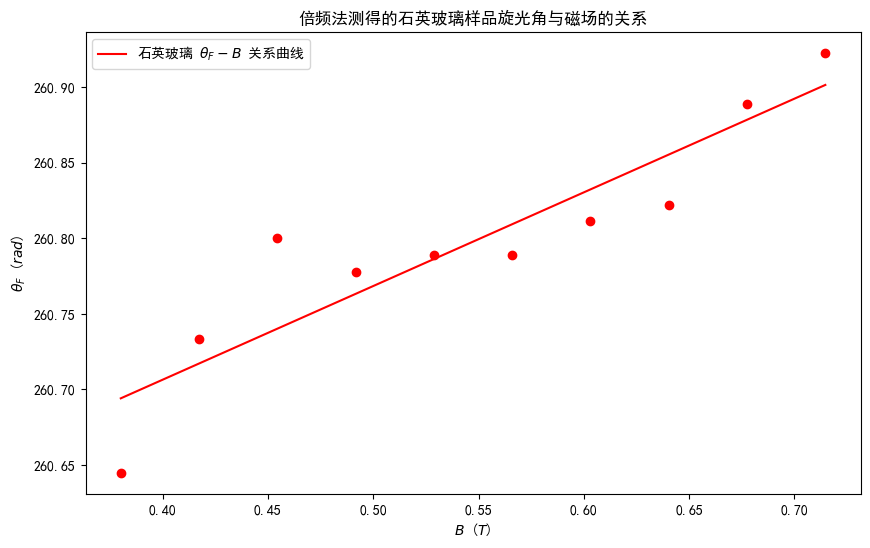

In [26]:
x4, y4 = get_data(my_sheet_name = '倍频法', my_cols='A, M')

my_plot(x4, y4, 
        my_x_label='$B$ ($T$)', my_y_label=r'$\theta_{F}$ ($rad$)', 
        my_label=r'石英玻璃 $\theta_{F}-B$ 关系曲线',
        my_title='倍频法测得的石英玻璃样品旋光角与磁场的关系', 
        my_figsize=(10, 6),
        liner_fit=True)

x: [0.3801, 0.41728000000000004, 0.45446, 0.49164, 0.52882, 0.5660000000000001, 0.60318, 0.64036, 0.67754, 0.71472]
y is: [2.5333333333333314, 2.8555555555555543, 3.0333333333333314, 3.1444444444444457, 3.3999999999999773, 3.5333333333333314, 3.622222222222206, 3.933333333333337, 4.099999999999994, 4.188888888888869]
y=4.8377*x+0.7862
R2 =  0.9887496453773902


C:\Users\86136\AppData\Local\Temp\ipykernel_22852\302232656.py:40: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("y=%.4f*x+%.4f" % (k,b))


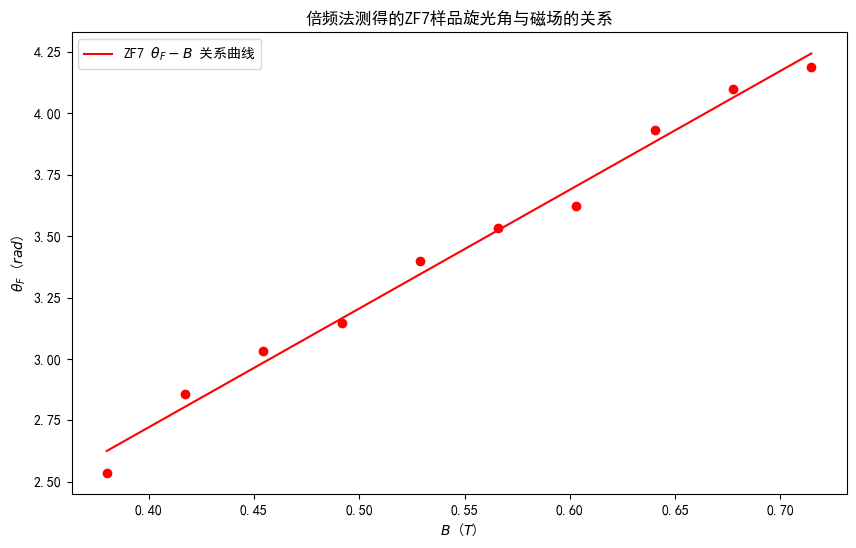

In [28]:
x5, y5 = get_data(my_sheet_name = '倍频法', my_cols='A, T')

my_plot(x5, y5, 
        my_x_label='$B$ ($T$)', my_y_label=r'$\theta_{F}$ ($rad$)', 
        my_label=r'ZF7 $\theta_{F}-B$ 关系曲线',
        my_title='倍频法测得的ZF7样品旋光角与磁场的关系', 
        my_figsize=(10, 6),
        liner_fit=True)

x: [0.3801, 0.41728000000000004, 0.45446, 0.49164, 0.52882, 0.5660000000000001, 0.60318, 0.64036, 0.67754, 0.71472]
y is: [188.66666666666666, 190.6222222222222, 191.46666666666664, 191.85555555555553, 192.54444444444442, 193.96666666666664, 195.06666666666666, 197.17777777777775, 197.71111111111108, 199.6111111111111]
y=30.6019*x+177.1171
R2 =  0.9770228714159931


C:\Users\86136\AppData\Local\Temp\ipykernel_22852\302232656.py:40: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("y=%.4f*x+%.4f" % (k,b))


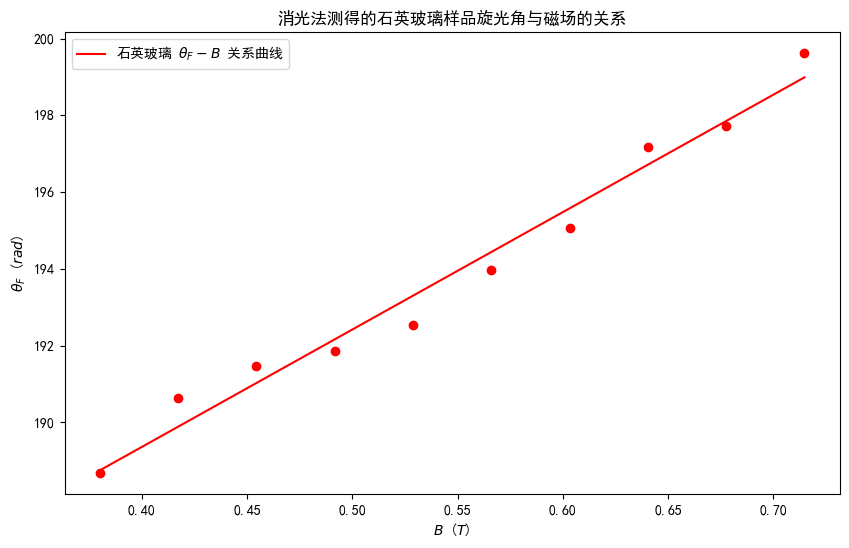

In [30]:
x6, y6 = get_data(my_sheet_name = '消光法', my_cols='A, G')

my_plot(x6, y6, 
        my_x_label='$B$ ($T$)', my_y_label=r'$\theta_{F}$ ($rad$)', 
        my_label=r'石英玻璃 $\theta_{F}-B$ 关系曲线',
        my_title='消光法测得的石英玻璃样品旋光角与磁场的关系', 
        my_figsize=(10, 6),
        liner_fit=True)

In [ ]:
def my_plot_2(x, y, my_label='', liner_fit=False, limition=False, my_color='red'):

    if limition:
        plt.xlim(0, 1.2*max(x))
        plt.ylim(0, 1.2*max(y))
    
    if liner_fit:
        X_train = np.array(x).reshape(len(x), 1)  
        Y_train = np.array(y).reshape(len(y), 1) 

        lineModel = LinearRegression()
        lineModel.fit(X_train, Y_train)

        Y_predict = lineModel.predict(X_train)

        #coef_是系数，intercept_是截距
        k = lineModel.coef_[0]
        b = lineModel.intercept_[0]
        
        print("y=%.4f*x+%.4f" % (k,b))
        print("R2 = ", lineModel.score(X_train, Y_train))

        plt.scatter(x, y, marker='o', color=my_color)
        plt.plot(X_train, Y_predict, c=my_color, label=my_label)

    else:
        plt.plot(x, y, marker='o', color='red', label=my_label)

    return

x: [0.3801, 0.41728000000000004, 0.45446, 0.49164, 0.52882, 0.5660000000000001, 0.60318, 0.64036, 0.67754, 0.71472]
y is: [157.05555555555554, 159.48888888888888, 161.32222222222222, 162.61111111111111, 164.73333333333335, 166.55555555555554, 168.54444444444445, 170.4111111111111, 171.98888888888888, 174.57777777777778]
y=50.5757*x+169.0433
R2 =  0.9979278979500452
y=29.0660*x+176.8023
R2 =  0.9941117808665207


C:\Users\86136\AppData\Local\Temp\ipykernel_22852\371903177.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("y=%.4f*x+%.4f" % (k,b))
C:\Users\86136\AppData\Local\Temp\ipykernel_22852\371903177.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("y=%.4f*x+%.4f" % (k,b))


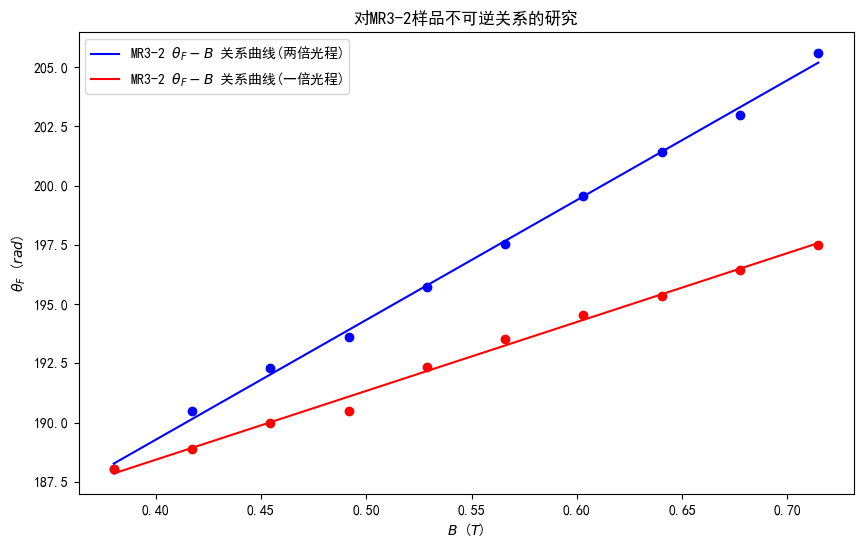

In [37]:
x7, y7 = get_data(my_sheet_name = '不可逆性验证', my_cols='B, H')

b = y3[0]-y7[0]
y7 = [y7[i] + b for i in range(len(y7))]

plt.figure(figsize=(10,6))
plt.title('对MR3-2样品不可逆关系的研究')
plt.xlabel('$B$ ($T$)')
plt.ylabel(r'$\theta_{F}$ ($rad$)')

my_plot_2(x7, y7, 
        my_label=r'MR3-2 $\theta_{F}-B$ 关系曲线(两倍光程)',
        liner_fit=True,
        my_color='blue')

my_plot_2(x3, y3,
        my_label=r'MR3-2 $\theta_{F}-B$ 关系曲线(一倍光程)',
        liner_fit=True,
        my_color='red')
plt.legend()
plt.show()

x: [0.3801, 0.5660000000000001, 0.7519, 0.9378, 1.1237000000000001]
y is: [0.74444444444444, 0.8333333333333144, 0.8555555555555543, 0.7666666666666515, 0.9444444444444287]


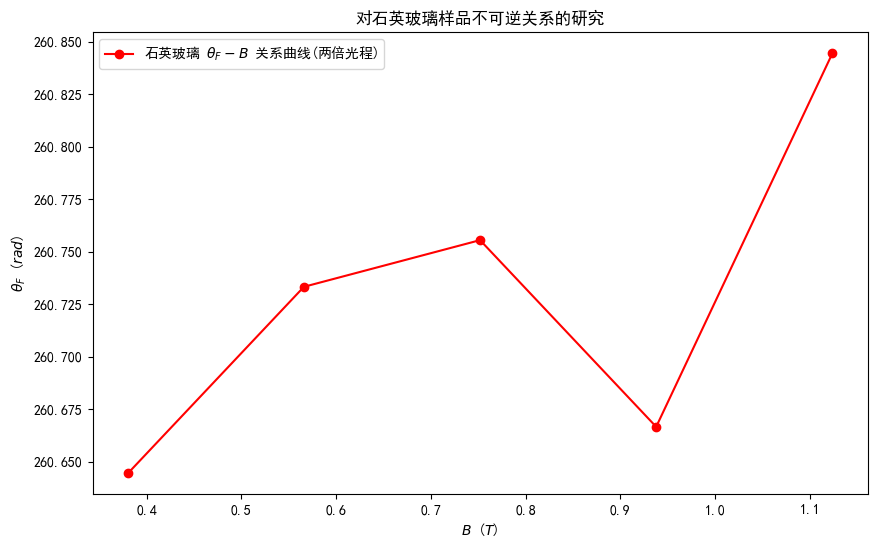

In [ ]:
x8, y8 = get_data(my_sheet_name = '不可逆性验证', my_cols='J, O')

my_plot(x8, y8, 
        my_x_label='$B$ ($T$)', my_y_label=r'$\theta_{F}$ ($rad$)', 
        my_label=r'石英玻璃 $\theta_{F}-B$ 关系曲线(两倍光程)',
        my_title='对石英玻璃样品不可逆关系的研究', 
        my_figsize=(10, 6),
        liner_fit=True)